<a href="https://colab.research.google.com/github/Jabed-Hasan/python/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris = load_iris()
X, y = iris.data, iris.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [4]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [5]:
y_pred = model.predict(X_test)


In [6]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1-score (macro): 1.0


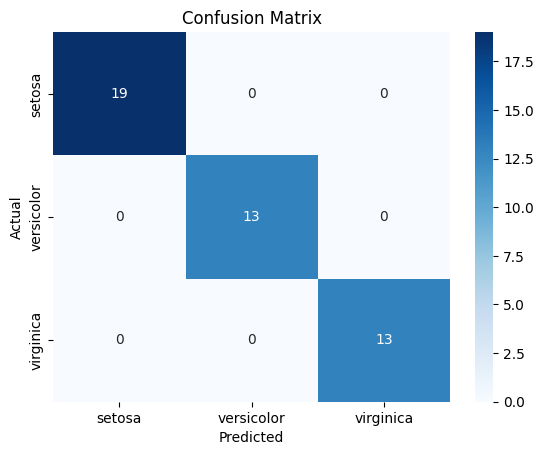

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#Task 1

Use only Sepal Length and Petal Width for training. Plot the selected features in a 2D scatter plot, showing two classes (e.g., Setosa vs. Versicolour).

Select 2 features: sepal length (X[:,0]) and petal width (X[:,3]).

Select 2 classes only (e.g., Setosa (0) vs Versicolor (1)).

Create a scatter plot (2D) to visualize.

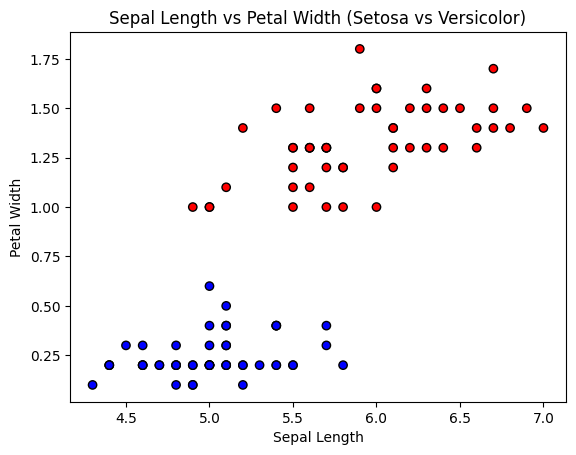

In [8]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, [0, 3]]   # sepal length & petal width
y = iris.target

# Select only Setosa (0) and Versicolor (1)
X = X[y < 2]
y = y[y < 2]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("Sepal Length vs Petal Width (Setosa vs Versicolor)")
plt.show()


#Task 2

Train a binary logistic regression model using the selected features and visualize the decision boundary using matplotlib.

Train logistic regression only on the filtered dataset (Setosa vs Versicolor).

Plot decision boundary:

Train the model.

Create a mesh grid.

Use predict on the grid.

Draw decision boundary with contourf.

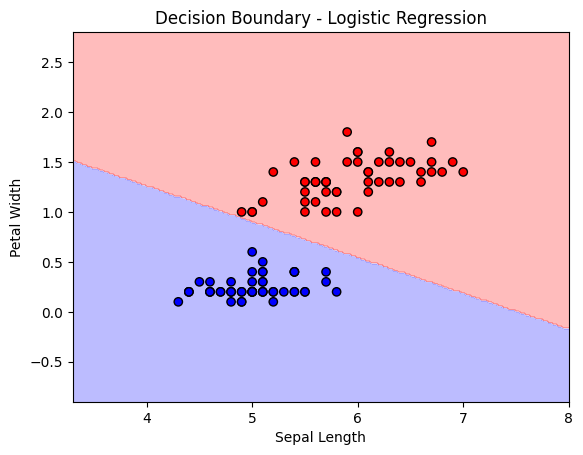

In [9]:
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression()
model.fit(X, y)

# Mesh grid for decision boundary
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("Decision Boundary - Logistic Regression")
plt.show()


#Task 3

Train the model separately using L1 and L2 regularization. Compare their effects on feature coefficients and model accuracy.

Logistic regression supports penalty='l1' or penalty='l2'.

With L1 → some coefficients may become zero (feature selection effect).

With L2 → coefficients shrink but rarely become zero (ridge effect).

In [10]:
# L1 Regularization (requires solver='liblinear')
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X, y)

# L2 Regularization
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X, y)

print("L1 coefficients:", model_l1.coef_)
print("L2 coefficients:", model_l2.coef_)

print("L1 accuracy:", model_l1.score(X, y))
print("L2 accuracy:", model_l2.score(X, y))


L1 coefficients: [[-1.122716    8.22257645]]
L2 coefficients: [[1.37485314 3.83897981]]
L1 accuracy: 1.0
L2 accuracy: 1.0


#Task 4

Use accuracy, precision, recall, F1-score, and the confusion matrix to evaluate the model. Display results using classification_report() and a heatmap of the confusion matrix.

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



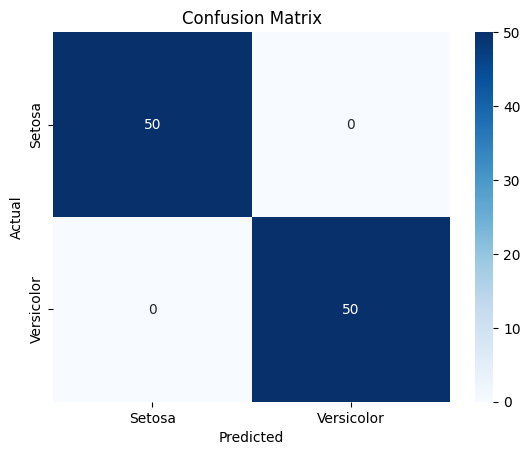

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X)

print("Classification Report:\n", classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=["Setosa","Versicolor"],
            yticklabels=["Setosa","Versicolor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
